In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pickle
from collections import OrderedDict

from scipy.optimize import curve_fit

def straight_line(x,m,b):
    return(m*x+b)

In [2]:
#####################
## Compaction data ##
#####################

p2_200_1 = pickle.load(open("p2_200nm_fc1s1_compact.p", "rb")) 
p2_200_2 = pickle.load(open("p2_200nm_fc1s2_compact.p", "rb"))
p2_200_3 = pickle.load(open("p2_200nm_fc2s1_compact.p", "rb")) 
p2_200_4 = pickle.load(open("p2_200nm_fc2s2_compact.p", "rb"))

p2_225_1 = pickle.load(open("p2_225nm_fc1s1_compact.p", "rb")) 
p2_225_2 = pickle.load(open("p2_225nm_fc1s2_compact.p", "rb"))
p2_225_3 = pickle.load(open("p2_225nm_fc2s1_compact.p", "rb")) 
p2_225_4 = pickle.load(open("p2_225nm_fc2s2_compact.p", "rb"))

p2_250_1 = pickle.load(open("p2_250nm_fc1s1_compact.p", "rb")) 
p2_250_2 = pickle.load(open("p2_250nm_fc1s2_compact.p", "rb"))
p2_250_3 = pickle.load(open("p2_250nm_fc2s1_compact.p", "rb")) 
p2_250_4 = pickle.load(open("p2_250nm_fc2s2_compact.p", "rb"))

p2_275_1 = pickle.load(open("p2_275nm_fc1s1_compact.p", "rb")) 
p2_275_2 = pickle.load(open("p2_275nm_fc1s2_compact.p", "rb"))
p2_275_3 = pickle.load(open("p2_275nm_fc2s1_compact.p", "rb")) 
p2_275_4 = pickle.load(open("p2_275nm_fc2s2_compact.p", "rb"))


#######################
## Decompaction data ##
#######################

D_p2_225_1 = pickle.load(open("p2_225nm_fc1s1_decompaction.p", "rb")) 
D_p2_225_2 = pickle.load(open("p2_225nm_fc1s2_decompaction.p", "rb"))
D_p2_225_3 = pickle.load(open("p2_225nm_fc2s1_decompaction.p", "rb")) 
D_p2_225_4 = pickle.load(open("p2_225nm_fc2s2_decompaction.p", "rb"))

D_p2_250_1 = pickle.load(open("p2_250nm_fc1s1_decompaction.p", "rb")) 
D_p2_250_2 = pickle.load(open("p2_250nm_fc1s2_decompaction.p", "rb"))
D_p2_250_3 = pickle.load(open("p2_250nm_fc2s1_decompaction.p", "rb"))
D_p2_250_4 = pickle.load(open("p2_250nm_fc2s1_decompaction.p", "rb"))

D_p2_275_1 = pickle.load(open("p2_275nm_fc1s1_decompaction.p", "rb")) 
D_p2_275_2 = pickle.load(open("p2_275nm_fc1s2_decompaction.p", "rb"))
D_p2_275_3 = pickle.load(open("p2_275nm_fc2s1_decompaction.p", "rb")) 
D_p2_275_4 = pickle.load(open("p2_275nm_fc2s2_decompaction.p", "rb"))


Individual Average Plots
----

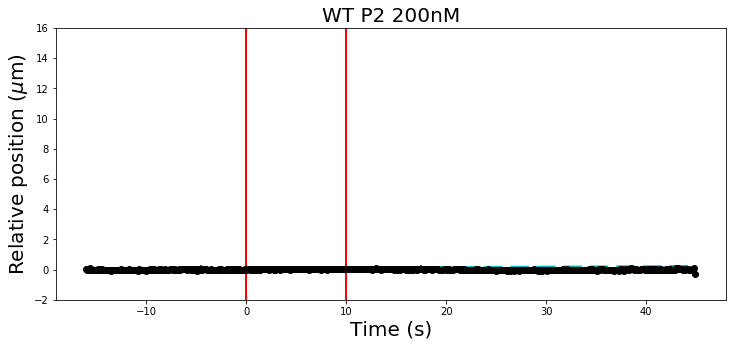

average velocity:  0.00 um/s
Number of traces = 71
Offset position = 54.16055659596286


In [3]:
D = OrderedDict()
count = 0
y_offsets = []
shift_t = [21.40,21.40,32.60,32.60]
shift_t_count = 0
for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [round((i*0.1)-shift_t[shift_t_count],1) for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
    shift_t_count+=1
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

fitrange = 100
framerate = 0.1
data = [t,a,s]
pickle.dump(data, open("p2_200_average.p", "wb"))

tindex = t.index(0) 
p,e = curve_fit(straight_line,t[tindex:tindex+fitrange],
                a[tindex:tindex+fitrange])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=fitrange*framerate,color = "red", linewidth = 2)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
ax1.plot(t,straight_line(np.array(t),*p), "c--", linewidth = 5)

#ax1.set_xlim(-3,40)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("WT P2 200nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset position = "+str(np.mean(y_offsets)))


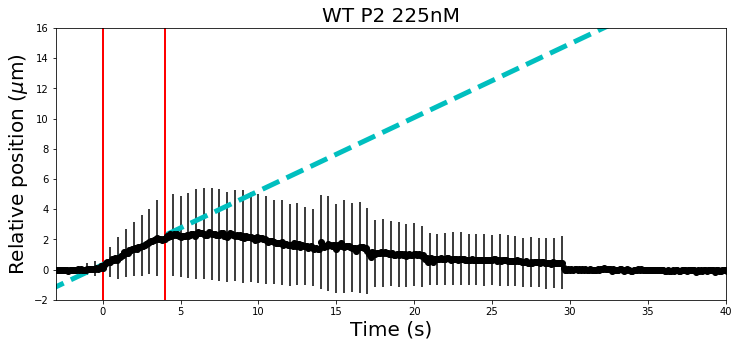

average velocity:  0.49 um/s
Number of traces = 63
Offset position = 53.28882454957655


In [4]:
D = OrderedDict()
count = 0
y_offsets = []
shift_t = [23.1,23.1,22.4,22.4]
shift_t_count = 0
for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [round((i*0.1)-shift_t[shift_t_count],1) for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
    shift_t_count+=1
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

fitrange = 40
framerate = 0.1
data = [t,a,s]
pickle.dump(data, open("p2_225_average.p", "wb"))

tindex = t.index(0) 
p,e = curve_fit(straight_line,t[tindex:tindex+fitrange],
                a[tindex:tindex+fitrange])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=fitrange*framerate,color = "red", linewidth = 2)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
ax1.plot(t,straight_line(np.array(t),*p), "c--", linewidth = 5)

ax1.set_xlim(-3,40)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("WT P2 225nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset position = "+str(np.mean(y_offsets)))



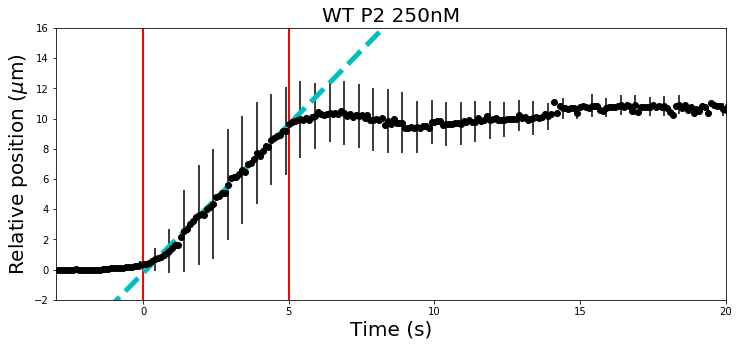

average velocity:  1.97 um/s
Number of traces = 95
Offset position = 55.234110568465795


In [5]:
D = OrderedDict()
count = 0
y_offsets = []
shift_t = [17.50,17.50,23.70,23.70]
shift_t_count = 0
for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,p2_250_4]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [round((i*0.1)-shift_t[shift_t_count],1) for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
    shift_t_count+=1
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

fitrange = 50
framerate = 0.1
data = [t,a,s]
pickle.dump(data, open("p2_250_average.p", "wb"))

tindex = t.index(0) 
p,e = curve_fit(straight_line,t[tindex:tindex+fitrange],
                a[tindex:tindex+fitrange])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=fitrange*framerate,color = "red", linewidth = 2)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
ax1.plot(t,straight_line(np.array(t),*p), "c--", linewidth = 5)

ax1.set_xlim(-3,20)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("WT P2 250nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset position = "+str(np.mean(y_offsets)))


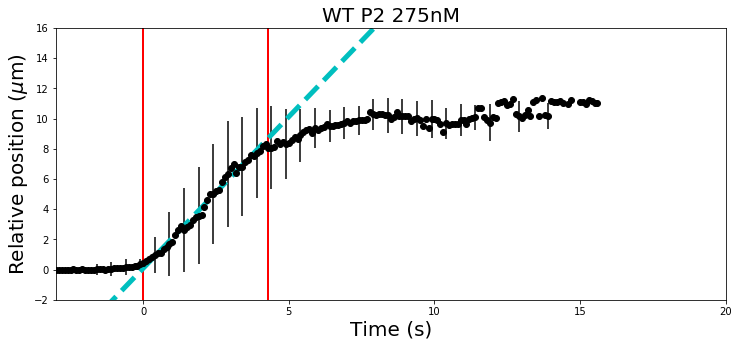

average velocity:  2.01 um/s
Number of traces = 108
Offset position = 52.74163163107363


In [6]:
D = OrderedDict()
count = 0
y_offsets = []
shift_t = [20.70,20.70,20.70,20.70]
shift_t_count = 0
for dataset,velo in [p2_275_1,p2_275_2,p2_275_3,p2_275_4]:
    for trace in dataset:
        count+=1
        x,y = trace
        offset = np.mean(y[0:15])
        y_offsets.append(offset)
        new_y = [(offset-i)*.266 for i in y]
        new_x = [round((i*0.1)-shift_t[shift_t_count],1) for i in x]
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
    shift_t_count+=1
            
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))

fitrange = 43
framerate = 0.1
data = [t,a,s]
pickle.dump(data, open("p2_275_average.p", "wb"))

tindex = t.index(0) 
p,e = curve_fit(straight_line,t[tindex:tindex+fitrange],
                a[tindex:tindex+fitrange])

fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.axvline(x=0*framerate,color = "red", linewidth = 2)
ax1.axvline(x=fitrange*framerate,color = "red", linewidth = 2)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=5, color = "k") 
ax1.plot(t,straight_line(np.array(t),*p), "c--", linewidth = 5)

ax1.set_xlim(-3,20)
ax1.set_ylim(-2,16)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("WT P2 275nM", fontsize = 20)
plt.show()

print("average velocity: ","{:.2f}".format(p[0]),"um/s")
print("Number of traces = "+str(count))
print("Offset position = "+str(np.mean(y_offsets)))

Altogether Average Plot
----

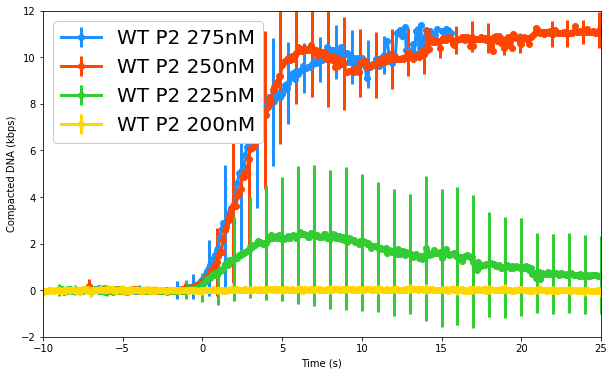

In [7]:
t_200,a_200,s_200 = pickle.load(open("p2_200_average.p", "rb"))
t_225,a_225,s_225 = pickle.load(open("p2_225_average.p", "rb"))
t_250,a_250,s_250 = pickle.load(open("p2_250_average.p", "rb"))
t_275,a_275,s_275 = pickle.load(open("p2_275_average.p", "rb"))


fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(111)

ax1.errorbar(t_275,a_275, yerr = s_275, 
             marker = "o", linewidth = 3, 
             errorevery=10, color = "dodgerblue",
             label = "WT P2 275nM")
ax1.errorbar(t_250,a_250, yerr = s_250, 
             marker = "o", linewidth = 3, 
             errorevery=10, color = "orangered",
             label = "WT P2 250nM")
ax1.errorbar(t_225,a_225, yerr = s_225, 
             marker = "o", linewidth = 3, 
             errorevery=10, color = "limegreen", 
             label = "WT P2 225nM")
ax1.errorbar(t_200,a_200, yerr = s_200, 
             marker = "o", linewidth = 3, 
             errorevery=10, color = "gold", 
             label = "WT P2 200nM")


ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Compacted DNA (kbps)")

ax1.set_xlim(-10,25)
ax1.set_ylim(-2,12)
plt.legend(loc=2, framealpha = 1, fontsize = 20)
#plt.savefig("abc_out.pdf", format = "pdf")
plt.show()


Individual Busy Plots
----

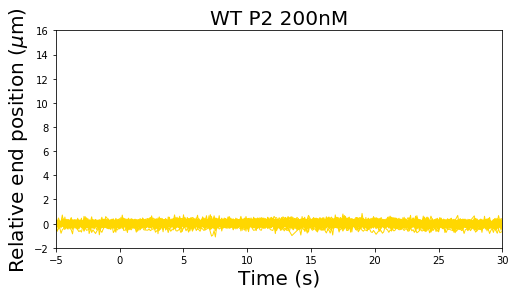

In [8]:
fig = plt.figure(figsize = (8,4))

shift_t = [21.40,21.40,32.60,32.60]
shift_t_count = 0
ax1 = fig.add_subplot(111)
for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "gold",
                 linewidth = 1)
    shift_t_count+=1
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-5,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("WT P2 200nM", fontsize = 20)

plt.show()

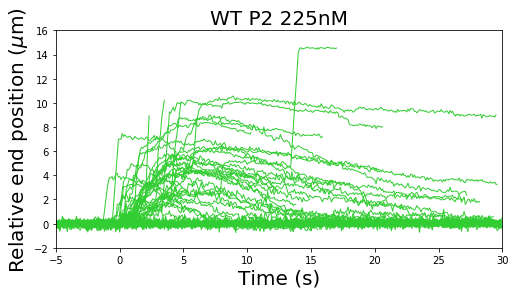

In [9]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

shift_t = [23.1,23.1,22.4,22.4]
shift_t_count = 0
for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "limegreen",
                 linewidth = 1)
    shift_t_count+=1
ax1.set_ylim(-2,16)
ax1.set_xlim(-5,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("WT P2 225nM", fontsize = 20)
plt.show()

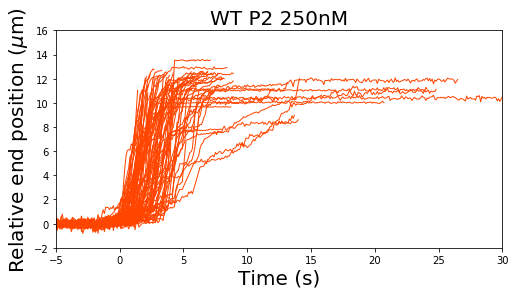

In [10]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

shift_t = [17.50,17.50,23.70,23.70]
shift_t_count = 0
for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,p2_250_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "orangered",
                 linewidth = 1)
    shift_t_count+=1
ax1.set_ylim(-2,16)
ax1.set_xlim(-5,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("WT P2 250nM", fontsize = 20)
plt.show()

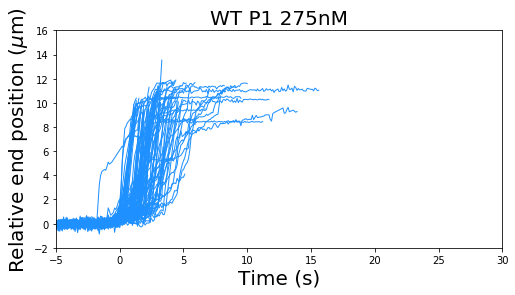

In [11]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

shift_t = [20.70,20.70,20.70,20.70]
shift_t_count = 0
for dataset,velo in [p2_275_1,p2_275_2,p2_275_3,p2_275_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "dodgerblue",
                 linewidth = 1)
    shift_t_count+=1
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-5,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
ax1.set_title("WT P1 275nM", fontsize = 20)
plt.show()

Altogether Busy Plot
----

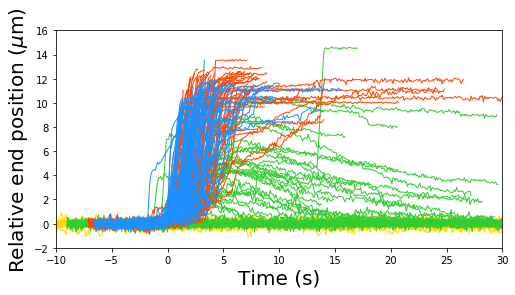

In [12]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

shift_t = [21.40,21.40,32.60,32.60]
shift_t_count = 0
for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "gold",
                 linewidth = 1)
    shift_t_count+=1

shift_t = [23.1,23.1,22.4,22.4]
shift_t_count = 0
for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "limegreen",
                 linewidth = 1)
    shift_t_count+=1
        
shift_t = [17.50,17.50,23.70,23.70]
shift_t_count = 0
for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,p2_250_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "orangered",
                 linewidth = 1)
    shift_t_count+=1
    
shift_t = [20.70,20.70,20.70,20.70]
shift_t_count = 0
for dataset,velo in [p2_275_1,p2_275_2,p2_275_3,p2_275_4]:
    for trace in dataset:
        x,y = trace
        offset = np.mean(y[0:15])
        new_y = [(offset-i)*.266 for i in y]
        new_x = [i*0.1 for i in x]
        shifted_x = [i-shift_t[shift_t_count] for i in new_x]
        ax1.plot(shifted_x,new_y,color = "dodgerblue",
                 linewidth = 1)
    shift_t_count+=1
        
ax1.set_ylim(-2,16)
ax1.set_xlim(-10,30)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
plt.show()

----

Velocity Histograms
----

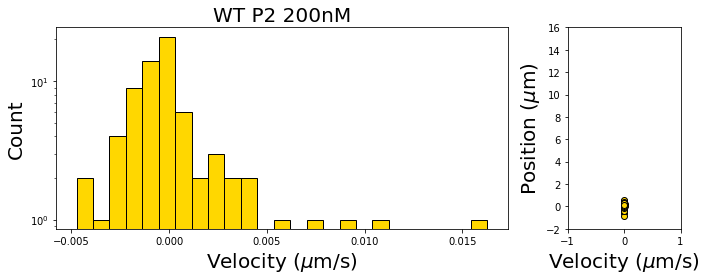

In [13]:

velocities = []
stop_positions = []

for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((54.16-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "gold", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("WT P2 200nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "gold", 
            ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

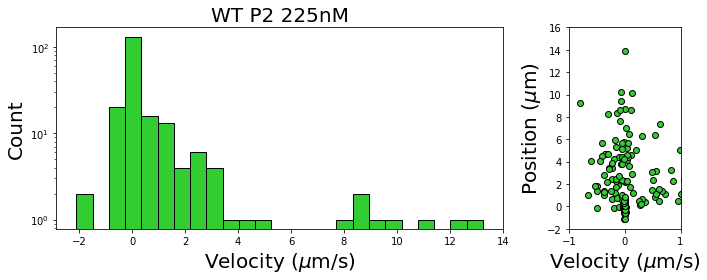

In [14]:
velocities = []
stop_positions = []

for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((53.28-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "limegreen", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("WT P2 225nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "limegreen", ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

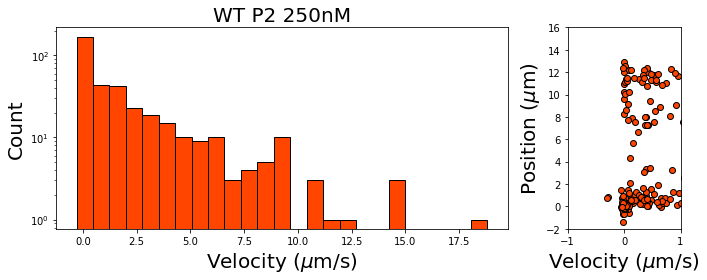

In [15]:
velocities = []
stop_positions = []

for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,p2_250_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((55.23-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "orangered", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("WT P2 250nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "orangered", 
            ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

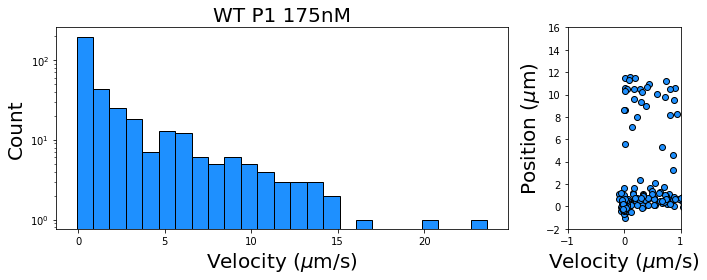

In [16]:
velocities = []
stop_positions = []

for dataset,velo in [p2_275_1,p2_275_2,p2_275_3,p2_275_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            velocities.append(speed_rescaled)
            stop_positions.append((52.74-pos)*.266)
        

fig = plt.figure(figsize = (10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.hist(velocities,25,fc = "dodgerblue", ec = "k")
ax1.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax1.set_ylabel("Count",
               fontsize = 20)
ax1.set_title("WT P1 175nM", fontsize = 20)
ax1.set_yscale('log', nonposy='clip')


ax2 = fig.add_subplot(gs[1])
ax2.scatter(velocities,stop_positions, fc = "dodgerblue", 
            ec = "k")

ax2.set_xlabel("Velocity ($\mu$m/s)", fontsize = 20)
ax2.set_ylabel("Position ($\mu$m)",
               fontsize = 20)
ax2.set_ylim(-2,16)
ax2.set_xlim(-1,1)
plt.tight_layout()
plt.show()

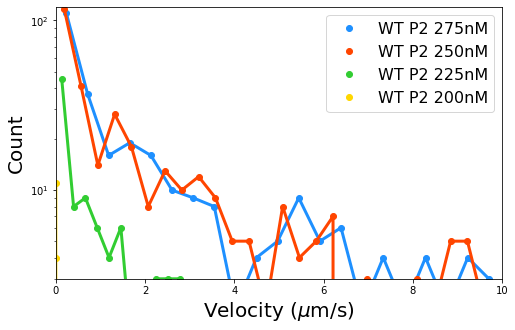

In [27]:
velocities_200 = []
for dataset,velo in [p2_200_1,p2_200_2,p2_200_3,p2_200_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_200.append(speed_rescaled)
velocities_225 = []
for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_225.append(speed_rescaled)
velocities_250 = []
for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,p2_250_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_250.append(speed_rescaled)
velocities_275 = []
for dataset,velo in [p2_275_1,p2_275_2,p2_275_3,p2_275_4]:
    for i in velo:
        for pos,speed in i:
            speed_rescaled = (-1*speed)*(10)*(.266)
            if speed_rescaled > 0:
                velocities_275.append(speed_rescaled)

            
plt.figure(figsize = (8,5))

n,bins = np.histogram(velocities_275, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "dodgerblue", linewidth = 3)
plt.semilogy(cens,n, c = "dodgerblue", marker = "o", 
             linestyle = "None", label = "WT P2 275nM")

n,bins = np.histogram(velocities_250, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "orangered", linewidth = 3)
plt.semilogy(cens,n, c = "orangered", marker = "o", 
             linestyle = "None", label = "WT P2 250nM")

n,bins = np.histogram(velocities_225, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "limegreen", linewidth = 3)
plt.semilogy(cens,n, c = "limegreen", marker = "o", 
             linestyle = "None", label = "WT P2 225nM")

n,bins = np.histogram(velocities_200, 50)
cens = [bins[i]+((bins[i+1]-bins[i])/2) for i in range(len(bins)-1)]
plt.semilogy(cens,n,c = "gold", linewidth = 3)
plt.semilogy(cens,n, c = "gold", marker = "o", 
             linestyle = "None", label = "WT P2 200nM")


plt.ylim(3,120)
plt.xlim(0,10)
plt.xlabel("Velocity ($\mu$m/s)", fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.legend(fontsize = 16)

plt.show()
        
        

Travel Distance
----

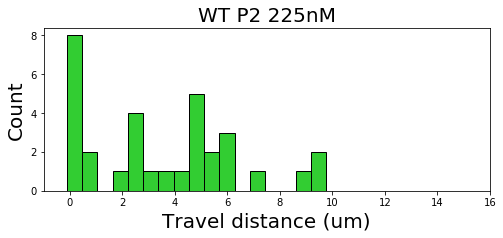

average travel distance:  2.26 um
average travel distance:  8568.39 bp


In [18]:
travel_dist = []
for dataset,velo in [p2_225_1,p2_225_2,p2_225_3,p2_225_4]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((53.28-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "limegreen", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("WT P2 225nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")



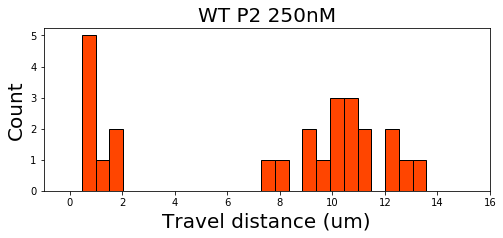

average travel distance:  7.52 um
average travel distance:  28581.35 bp


In [19]:
travel_dist = []
for dataset,velo in [p2_250_1,p2_250_2,p2_250_3,p2_250_4]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((55.23-pos)*.266)

            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "orangered", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("WT P2 250nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")


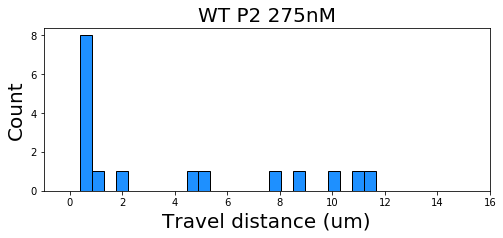

average travel distance:  3.96 um
average travel distance:  15043.55 bp


In [20]:
travel_dist = []
for dataset,velo in [p2_275_1,p2_275_2,p2_275_3,p2_275_4]:
    for i in velo:
        if len(i)>2:
            stop_positions = []
            for pos,speed in i:
                speed_rescaled = (-1*speed)*(10)*(.266)
                if abs(speed_rescaled)<0.1:
                    stop_positions.append((52.74-pos)*.266)
            for d in np.diff(stop_positions):
                travel_dist.append(d)
plt.figure(figsize = (8,3)) 
plt.hist(travel_dist, 25, fc = "dodgerblue", ec = "k")
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Travel distance (um)", fontsize = 20)
plt.title("WT P2 275nM", fontsize = 20)
plt.xlim(-1,16)
plt.show()

print("average travel distance: ","{:.2f}".format(np.mean(travel_dist)),"um")
print("average travel distance: ","{:.2f}".format((np.mean(travel_dist)/.266)*(48502/48)),"bp")


Decompaction
----

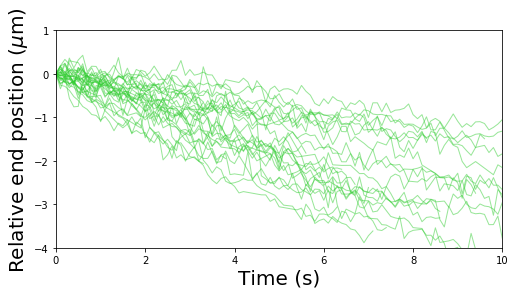

In [21]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

D = OrderedDict()
for dataset,velo in [D_p2_225_1,D_p2_225_2,D_p2_225_3,D_p2_225_4]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*.1 for i in x]
        ax1.plot(new_x, new_y, color = "limegreen", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
       
            
ax1.set_ylim(-4,1)
ax1.set_xlim(0,10)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
plt.show()

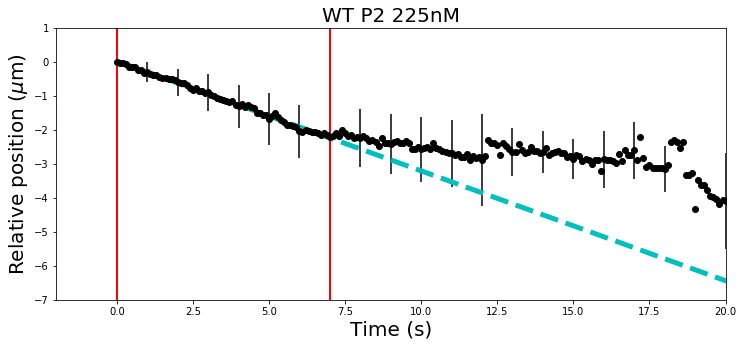

average decompaction rate:  0.32 um/sec
average decompaction rate:  1227.95 bp/s


In [22]:
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))


l,r1 = 0,70
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=10, color = "k") 

p1,e = curve_fit(straight_line,t[l:r1],a[l:r1])
ax1.plot(t,straight_line(np.array(t),*p1), "c--", linewidth = 5)

ax1.axvline(x=t[l],color = "red", linewidth = 2)
ax1.axvline(x=t[r1],color = "red", linewidth = 2)

ax1.set_xlim(-2,20)
ax1.set_ylim(-7,1)
ax1.set_xlabel("Time (s)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("WT P2 225nM", fontsize = 20)
plt.show()

print("average decompaction rate: ","{:.2f}".format(-1*p1[0]),"um/sec")
print("average decompaction rate: ","{:.2f}".format(((-1*p1[0])/.266)*(48502/48)),"bp/s")


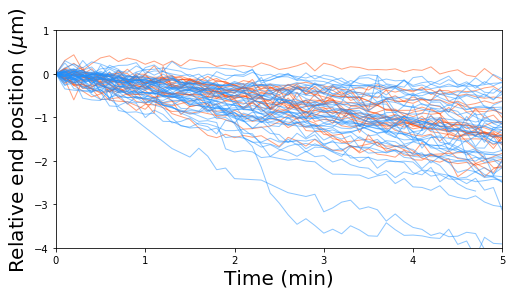

In [28]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)


for dataset,velo in [D_p2_250_1,D_p2_250_2,D_p2_250_3]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(0.1) for i in x]
        ax1.plot(new_x, new_y, color = "orangered", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
for dataset,velo in [D_p2_275_1,D_p2_275_2,D_p2_275_3,D_p2_275_4]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(0.1) for i in x]
        ax1.plot(new_x, new_y, color = "dodgerblue", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
        

            
ax1.set_ylim(-4,1)
ax1.set_xlim(0,5)
ax1.set_xlabel("Time (min)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
plt.show()

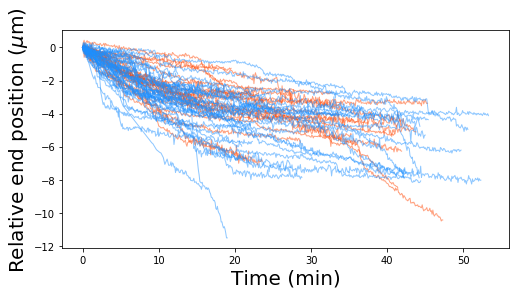

In [29]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)


for dataset,velo in [D_p2_250_1,D_p2_250_2,D_p2_250_3]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(0.1) for i in x]
        ax1.plot(new_x, new_y, color = "orangered", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
            
for dataset,velo in [D_p2_275_1,D_p2_275_2,D_p2_275_3,D_p2_275_4]:
    for trace in dataset:
        x,y = trace
        new_y = [(y[0]-i)*.266 for i in y]
        new_x = [(i-x[0])*(0.1) for i in x]
        ax1.plot(new_x, new_y, color = "dodgerblue", 
                 linewidth = 1, alpha = 0.5)
        for t,p in zip(new_x,new_y):
            D.setdefault(t, []).append(p)
        

            
#ax1.set_ylim(-4,1)
#ax1.set_xlim(0,5)
ax1.set_xlabel("Time (min)", fontsize = 20)
ax1.set_ylabel("Relative end position ($\mu$m)",
               fontsize = 20)
plt.show()

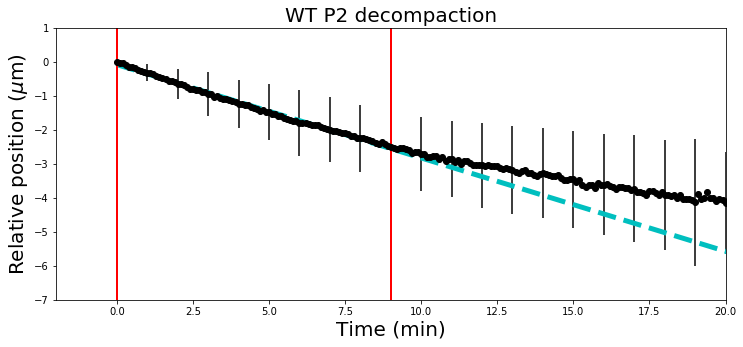

average decompaction rate:  0.27 um/min
average decompaction rate:  1043.85 bp/min


In [25]:
Averaged = sorted([(t,np.mean(p)) for t, p in D.items()], key=lambda x: x[0])
errors = sorted([(t,np.std(p)) for t, p in D.items()], key=lambda x: x[0])
t,a = map(list, zip(*Averaged))
_,s = map(list, zip(*errors))


l,r1 = 0,90
fig = plt.figure(figsize = (12,5))
ax1 = fig.add_subplot(111)
ax1.errorbar(t,a, yerr = s, 
             marker = "o", linestyle = "None", 
             errorevery=10, color = "k") 

p1,e = curve_fit(straight_line,t[l:r1],a[l:r1])
ax1.plot(t,straight_line(np.array(t),*p1), "c--", linewidth = 5)

ax1.axvline(x=t[l],color = "red", linewidth = 2)
ax1.axvline(x=t[r1],color = "red", linewidth = 2)

ax1.set_xlim(-2,20)
ax1.set_ylim(-7,1)
ax1.set_xlabel("Time (min)", fontsize = 20)
ax1.set_ylabel("Relative position ($\mu$m)",
               fontsize = 20)
ax1.set_title("WT P2 decompaction", fontsize = 20)
plt.show()

print("average decompaction rate: ","{:.2f}".format(-1*p1[0]),"um/min")
print("average decompaction rate: ","{:.2f}".format(((-1*p1[0])/.266)*(48502/48)),"bp/min")


$$
\begin{align}
\Delta \Delta G^\ddagger_{2 \to 1} = k_bT\ln \left [\frac{k_d^{(1)}}{k_d^{(2)}} \right]=k_bT\ln \left [\frac{v^{(1)}}{v^{(2)}} \right]
\end{align}
$$


In [31]:
print("relative to WT P1 --> ΔΔG = ","{:.2f}".format(np.log(0.27/0.46)),"kT") 
print("relative to K49A P1 --> ΔΔG = ","{:.2f}".format(np.log(0.27/0.99)),"kT") 

relative to WT P1 --> ΔΔG =  -0.53 kT
relative to K49A P1 --> ΔΔG =  -1.30 kT
